In [51]:
import numpy as np
import pandas as pd
import re
import os
from collections import Counter
import ast
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [52]:
# Tải tệp csv lên
file_path = 'EDA_Data.csv'
anime_data = pd.read_csv(file_path)
anime_data.head(5)

,title,view,vote,describe,movie_genre,director,nation,folower,quality,rating,language,season
0,tiểu lam và tiểu lục 3,8681.0,1.6,phần 3 của tiểu lam và tiểu lục,"['anime bộ', 'fantasy', 'drama', 'comedy,']",không rõ,trung quốc,70.0,hd,pg-13 - teens 13 tuổi trở lên,vietsub,2023.0
1,thất hầu bút lục,2495.0,5.0,"hai nghìn năm trước, một hậu duệ của gia tộc y...","['anime bộ', 'fantasy', 'adventure', 'historic...",không rõ,trung quốc,250.0,hd,pg-13 - teens 13 tuổi trở lên,vietsub,2023.0
2,kiếm vực phong vân,1247603.0,7.7,"trên kiếm vực đại lục xa xưa, có mười thanh ki...","['anime bộ', 'fantasy', 'adventure', 'martial ...",không rõ,trung quốc,1417.0,hd,pg-13 - teens 13 tuổi trở lên,vietsub,2021.0
3,cửu thiên huyền đế quyết,1773588.0,4.7,tương truyền huyền đế tạo ra cửu thiên huyền đ...,"['anime bộ', 'action,']",không rõ,trung quốc,2077.0,hd,không rõ,vietsub,2021.0
4,ngạo thế cửu trùng thiên,182044.0,9.8,vì nắm giữ thần vật cửu kiếp kiếm của đại lục ...,"['anime bộ', 'cartoon,']",không rõ,trung quốc,2140.0,hd,pg-13 - teens 13 tuổi trở lên,vietsub,2023.0


In [53]:
# Basic information about the dataset
info = anime_data.info()

# Descriptive statistics
descriptive_stats = anime_data.describe()

# Checking for missing values
missing_values = anime_data.isnull().sum()

# Preparing output
info, descriptive_stats, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4780 entries, 0 to 4779
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4778 non-null   object 
 1   view         4778 non-null   float64
 2   vote         4778 non-null   float64
 3   describe     4778 non-null   object 
 4   movie_genre  4778 non-null   object 
 5   director     4778 non-null   object 
 6   nation       4778 non-null   object 
 7   folower      4778 non-null   float64
 8   quality      4778 non-null   object 
 9   rating       4778 non-null   object 
 10  language     4778 non-null   object 
 11  season       4778 non-null   float64
dtypes: float64(4), object(8)
memory usage: 448.3+ KB


(None,
                view         vote        folower       season
 count  4.778000e+03  4778.000000    4778.000000  4778.000000
 mean   4.531357e+05     8.384575    1559.427585  2014.157597
 std    2.222540e+06     1.600287    3032.251479     7.700897
 min    1.700000e+01     1.000000       0.000000  1971.000000
 25%    2.518700e+04     7.800000     140.000000  2011.000000
 50%    6.705150e+04     9.000000     570.000000  2016.000000
 75%    2.673908e+05     9.500000    1970.000000  2019.000000
 max    1.089651e+08    10.000000  118954.000000  2099.000000,
 title          2
 view           2
 vote           2
 describe       2
 movie_genre    2
 director       2
 nation         2
 folower        2
 quality        2
 rating         2
 language       2
 season         2
 dtype: int64)

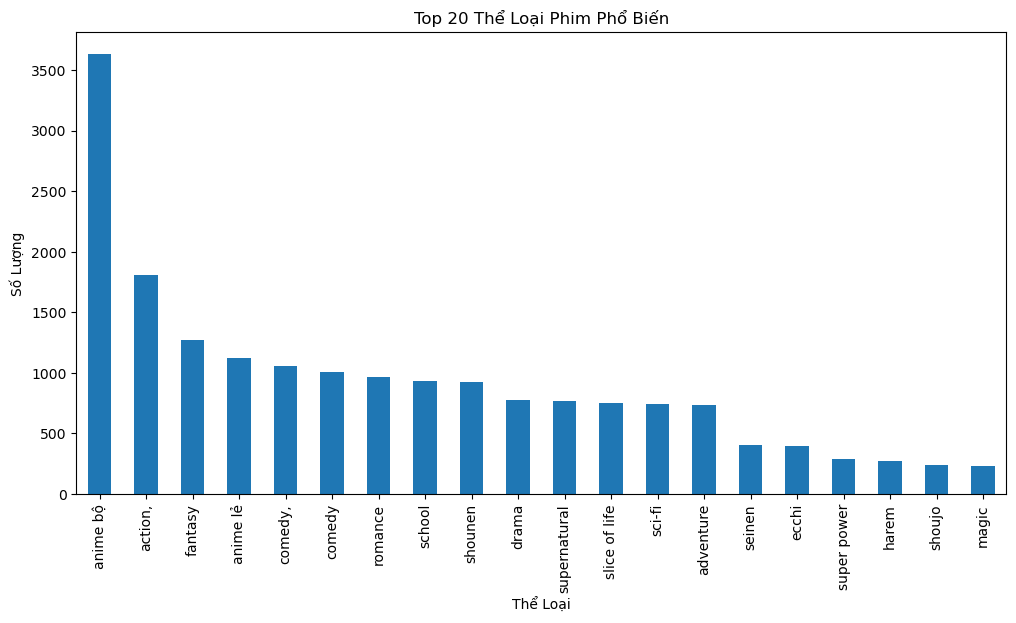

In [54]:
# Correctly parsing the 'movie_genre' column
def parse_genres(genre_str):
    try:
        # Safely evaluate the string if it is not null
        return eval(genre_str) if pd.notnull(genre_str) else []
    except:
        # Return empty list in case of any error
        return []

# Apply the parsing function to the 'movie_genre' column
anime_data['movie_genre'] = anime_data['movie_genre'].apply(parse_genres)

# Recounting genres
all_genres = sum(anime_data['movie_genre'], [])
genres_freq = pd.Series(all_genres).value_counts()

# Plotting the corrected genre analysis
plt.figure(figsize=(12, 6))
genres_freq[:20].plot(kind='bar')
plt.title('Top 20 Thể Loại Phim Phổ Biến')
plt.xlabel('Thể Loại')
plt.ylabel('Số Lượng')
plt.show()


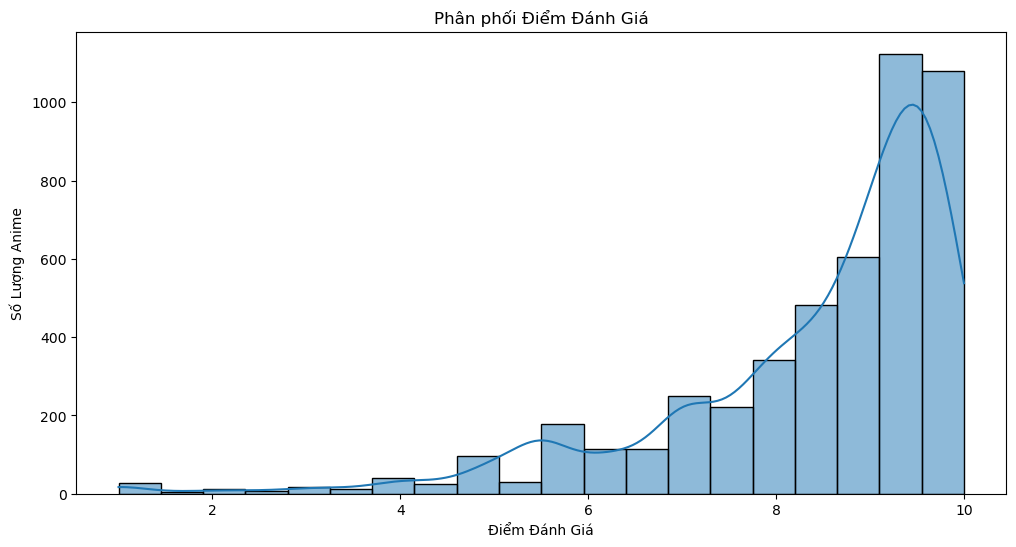

In [55]:
# 1. Analyzing Distribution of Ratings (Votes)
plt.figure(figsize=(12, 6))
sns.histplot(anime_data['vote'], kde=True, bins=20)
plt.title('Phân phối Điểm Đánh Giá')
plt.xlabel('Điểm Đánh Giá')
plt.ylabel('Số Lượng Anime')
plt.show()

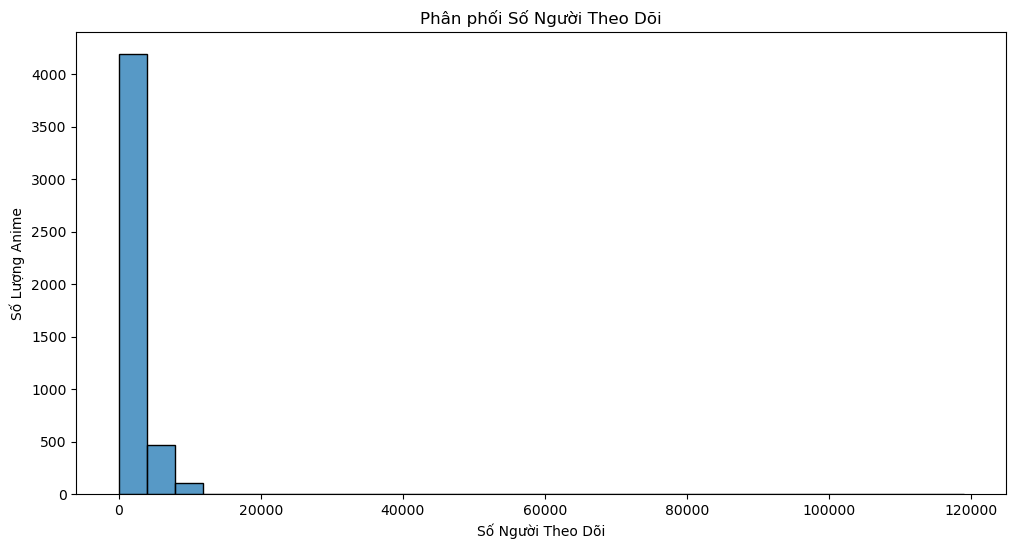

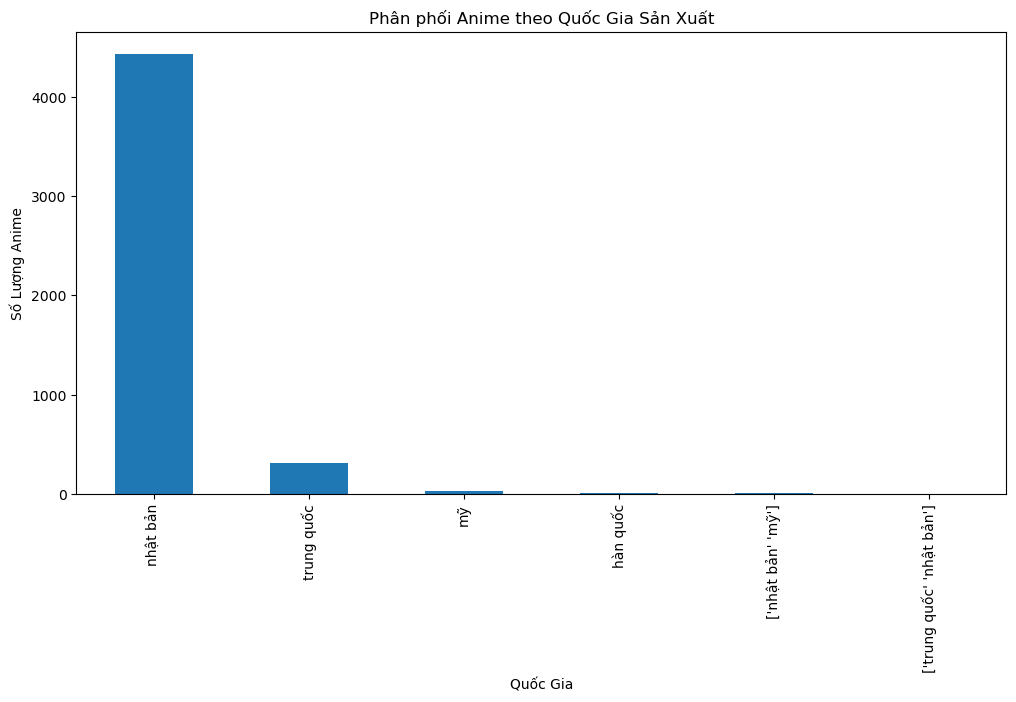

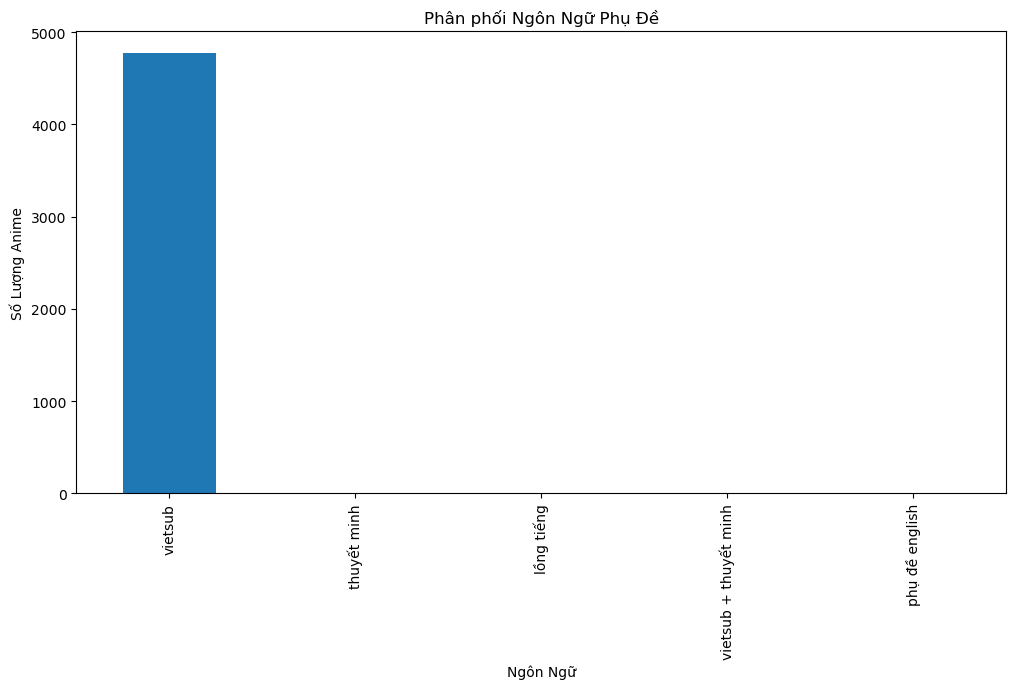

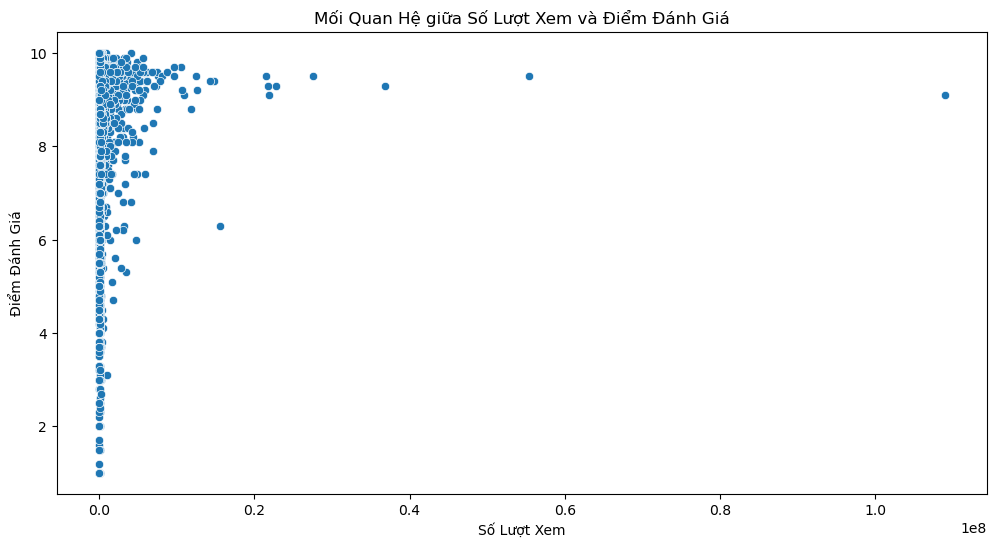

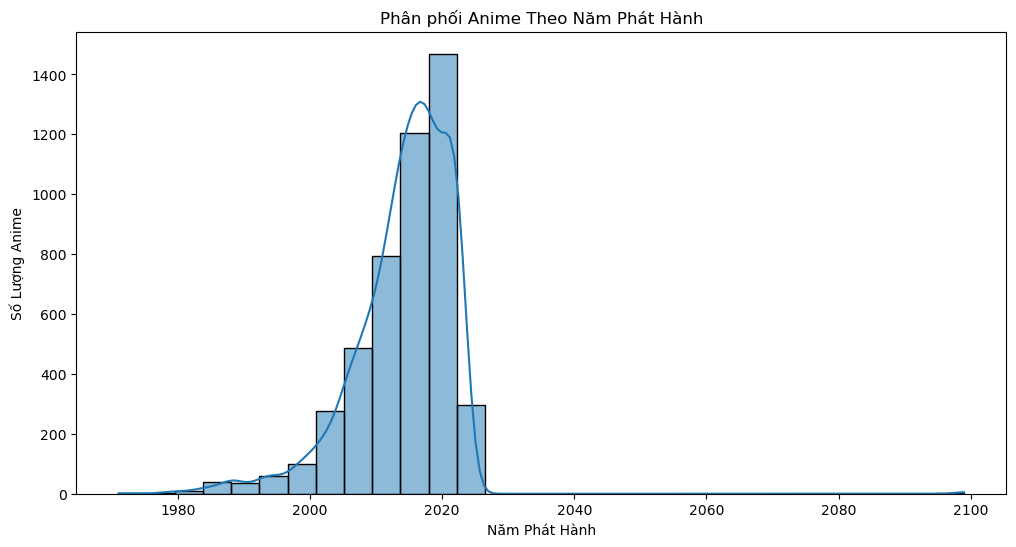

In [58]:
# 3. Analyzing Follower Trends again
plt.figure(figsize=(12, 6))
sns.histplot(anime_data['folower'], kde=False, bins=30)
plt.title('Phân phối Số Người Theo Dõi')
plt.xlabel('Số Người Theo Dõi')
plt.ylabel('Số Lượng Anime')
plt.show()

# 4. Analyzing Productions by Nations again
plt.figure(figsize=(12, 6))
anime_data['nation'].value_counts().plot(kind='bar')
plt.title('Phân phối Anime theo Quốc Gia Sản Xuất')
plt.xlabel('Quốc Gia')
plt.ylabel('Số Lượng Anime')
plt.show()

# 5. Analyzing Language Preferences again
plt.figure(figsize=(12, 6))
anime_data['language'].value_counts().plot(kind='bar')
plt.title('Phân phối Ngôn Ngữ Phụ Đề')
plt.xlabel('Ngôn Ngữ')
plt.ylabel('Số Lượng Anime')
plt.show()

# 6. Analyzing Relationship between Views and Votes again
plt.figure(figsize=(12, 6))
sns.scatterplot(data=anime_data, x='view', y='vote')
plt.title('Mối Quan Hệ giữa Số Lượt Xem và Điểm Đánh Giá')
plt.xlabel('Số Lượt Xem')
plt.ylabel('Điểm Đánh Giá')
plt.show()

# 7. Analyzing Trends in Season (Year of Release) again
plt.figure(figsize=(12, 6))
sns.histplot(anime_data['season'], kde=True, bins=30)
plt.title('Phân phối Anime Theo Năm Phát Hành')
plt.xlabel('Năm Phát Hành')
plt.ylabel('Số Lượng Anime')
plt.show()

In [59]:
anime_data.head(5)

,title,view,vote,describe,movie_genre,director,nation,folower,quality,rating,language,season
0,tiểu lam và tiểu lục 3,8681.0,1.6,phần 3 của tiểu lam và tiểu lục,"[anime bộ, fantasy, drama, comedy,]",không rõ,trung quốc,70.0,hd,pg-13 - teens 13 tuổi trở lên,vietsub,2023.0
1,thất hầu bút lục,2495.0,5.0,"hai nghìn năm trước, một hậu duệ của gia tộc y...","[anime bộ, fantasy, adventure, historical, mar...",không rõ,trung quốc,250.0,hd,pg-13 - teens 13 tuổi trở lên,vietsub,2023.0
2,kiếm vực phong vân,1247603.0,7.7,"trên kiếm vực đại lục xa xưa, có mười thanh ki...","[anime bộ, fantasy, adventure, martial arts, a...",không rõ,trung quốc,1417.0,hd,pg-13 - teens 13 tuổi trở lên,vietsub,2021.0
3,cửu thiên huyền đế quyết,1773588.0,4.7,tương truyền huyền đế tạo ra cửu thiên huyền đ...,"[anime bộ, action,]",không rõ,trung quốc,2077.0,hd,không rõ,vietsub,2021.0
4,ngạo thế cửu trùng thiên,182044.0,9.8,vì nắm giữ thần vật cửu kiếp kiếm của đại lục ...,"[anime bộ, cartoon,]",không rõ,trung quốc,2140.0,hd,pg-13 - teens 13 tuổi trở lên,vietsub,2023.0


In [61]:
# Lưu dữ liệu vào tệp CSV "animeclear.csv"
anime_data.to_csv('anime_clear_procession.csv', index=False)